In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score

In [ ]:
#pip install sunbird

In [ ]:
 from sunbird.categorical_encoding import frequency_encoding

In [7]:
df_data=pd.read_csv('/content/drive/MyDrive/Imarticus/extra/data.csv')
df_data.shape

(801, 20532)

In [8]:
df_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [9]:
df_labels=pd.read_csv('/content/drive/MyDrive/Imarticus/extra/labels.csv')
df_labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


Let's merge both the datasets so that we can add target column to our dataset

In [10]:
df=df_data.merge(df_labels,on='Unnamed: 0',how='inner')

In [11]:
df.shape

(801, 20533)

In [12]:
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [13]:
#Renaming the Unnamed: 0 as Sample

In [14]:
df=df.rename(columns={'Unnamed: 0':'Sample'})

In [15]:
#String split to get the sample nos

In [16]:
def str_split(x):
    return re.findall('(\d+|[A-Za-z_]+)',x)

In [17]:
df['Sample']=df['Sample'].apply(lambda x:str_split(x)).apply(lambda x:int(x[-1]))

In [18]:
#Plotting a hierarchically clustered heatmap

In [19]:
#pip install fastcluster

In [20]:
df1=df.copy(deep=True)

In [21]:
le=LabelEncoder()

df1['Class']=le.fit_transform(df1['Class'])

In [22]:
import fastcluster

ModuleNotFoundError: ignored

In [23]:
X=fastcluster.linkage (df1, method='single', metric='euclidean', preserve_input='True')

NameError: ignored

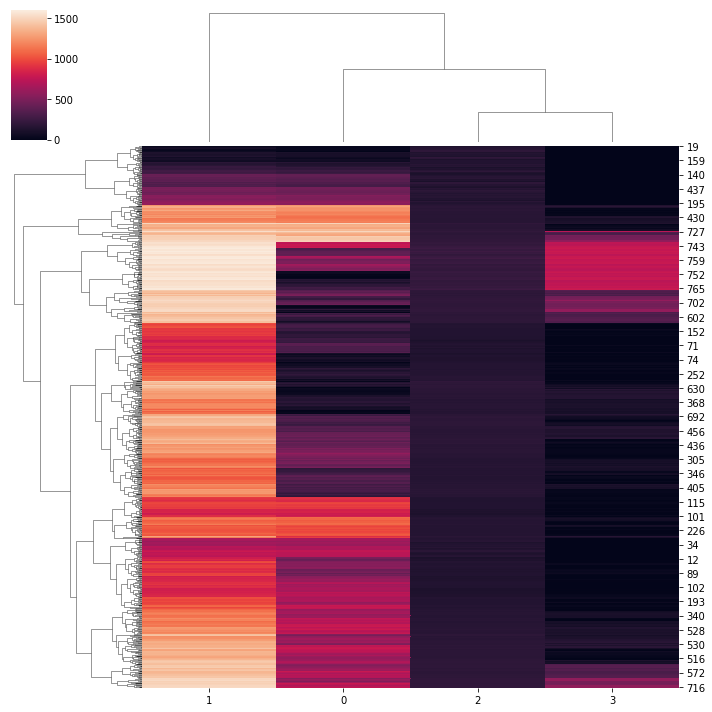

In [ ]:
sns.clustermap(X)

In [24]:
df1.Class.value_counts()

0    300
2    146
3    141
4    136
1     78
Name: Class, dtype: int64

In [25]:
df2=df1.copy(deep=True)

In [26]:
df2 = df2.sample(n=10,axis='columns')

In [27]:
df2.shape

(801, 10)

In [28]:
df2.head()

,gene_7054,gene_8329,gene_3674,gene_8158,gene_11784,gene_16630,gene_9583,gene_9555,gene_13432,gene_5547
0,2.824951,0.591871,9.924363,0.591871,10.929258,1.334282,10.492164,0.000000,3.188164,9.167672
1,5.652455,4.330264,9.195490,0.000000,8.957854,0.000000,10.134182,2.399417,7.287168,9.395161
2,4.042355,0.796598,8.864307,0.000000,9.543214,0.000000,9.960972,0.000000,3.299230,9.252079
3,4.270013,0.000000,9.637981,0.000000,11.386245,0.000000,11.895109,0.000000,3.485672,8.418848
4,4.345574,4.365609,7.773159,1.036890,11.584963,0.000000,12.083429,1.831269,4.443070,9.244366


In [29]:
y=fastcluster.linkage (df2, method='single', metric='euclidean', preserve_input='True')

NameError: ignored

In [30]:
sns.clustermap(y)

NameError: ignored

In [31]:
df.head()

,Sample,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [32]:
#Checking for Null Values

In [33]:
df.isnull().sum()

Sample        0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20533, dtype: int64

In [34]:
#We can see that there are no null values in the data

In [35]:
df.describe()

,Sample,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,400.000000,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,231.373075,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,200.000000,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,400.000000,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,600.000000,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,800.000000,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [36]:
#Checking for target class

In [37]:
df.Class.value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [38]:
#We need to balance this using SMOTE

In [39]:
#Checking for distribution

In [40]:
#for col in df.columns:
  #sns.kdeplot(x=col,data=df)
  #plt.show()

In [41]:
#Reducing the dimensions using PCA

In [42]:
df4=df.copy(deep=True)

In [43]:
#Dropping the Sample no. as we do not requie it for model building

In [44]:
df4=df4.drop('Sample',axis=1)

In [45]:
#Separating the dependent and independent columns

In [46]:
X=df4.drop('Class',axis=1)
y=df4['Class']

In [47]:
sc=StandardScaler()

X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,-0.065633,...,-1.300200,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901
1,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,-0.065633,...,-1.747076,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901
2,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,-0.065633,...,-1.034088,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901
3,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,-0.065633,...,0.241299,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901
4,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,-0.065633,...,0.133335,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901


In [48]:
pca=PCA()

In [49]:
pca_df=pca.fit_transform(df_X_scaled)
pca_df

array([[-5.74469869e+01,  9.54109807e+01,  7.43015433e+01, ...,
         1.88147724e-01,  2.17846349e-01,  3.48679841e-15],
       [-1.69194301e+01,  7.32470333e-01, -6.40728996e+01, ...,
        -2.86567894e-01,  2.32000946e-01,  3.48679841e-15],
       [-7.03452179e+01, -1.93033266e+01,  2.04882405e+01, ...,
         3.52739154e-02,  7.17769124e-02,  3.48679841e-15],
       ...,
       [-4.13308968e+00,  1.56900139e+01, -2.26444535e+01, ...,
         3.67413088e-01,  7.56620253e-02,  3.48679841e-15],
       [-3.08147575e+01,  3.35264225e+01,  7.05656359e+01, ...,
        -1.31419635e-01, -1.52471070e-01,  3.48679841e-15],
       [-2.23445567e+01,  4.05235632e+00,  3.23278757e+01, ...,
         1.19938737e+00, -6.22401143e-01,  3.48679841e-15]])

In [50]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.10539781 0.19294014 0.27104095 0.32269742 0.36298674 0.39219555
 0.4157429  0.43719589 0.4535159  0.4658549  0.47639585 0.48534137
 0.4938457  0.50137554 0.50804164 0.51451104 0.52059718 0.52644779
 0.53174145 0.53689634 0.54178893 0.54644727 0.55099725 0.55547361
 0.5597223  0.56390368 0.56792795 0.57186402 0.57576802 0.5793549
 0.58293073 0.58643051 0.58980389 0.59312912 0.59637582 0.59957708
 0.60266929 0.60562123 0.60847149 0.61127547 0.61404684 0.61673629
 0.61939671 0.62200713 0.62459575 0.62715143 0.62967384 0.63216553
 0.63460368 0.63698228 0.63932007 0.64161691 0.6438847  0.6461338
 0.64830846 0.65045804 0.65258877 0.65469638 0.65674443 0.65878684
 0.66078541 0.66276172 0.66473495 0.6666836  0.66860853 0.67045135
 0.67227289 0.67406696 0.67583523 0.67759777 0.67932291 0.68103012
 0.68272454 0.68440631 0.6860543  0.68768444 0.68928501 0.69085939
 0.69241824 0.69396636 0.69549471 0.69699594 0.69848771 0.69997178
 0.70141401 0.70285267 0.70428939 0.70571084 0.70711356 0.708506

In [51]:
#With 615 features, we can cater 97 % variance in the data

In [52]:
df_pca=pd.DataFrame(pca_df[:,:615])
df_pca.shape

(801, 615)

In [53]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,612,613,614
0,-57.446987,95.410981,74.301543,-12.166781,7.981831,36.157573,-7.668542,19.951444,0.142216,3.035240,...,1.130620,0.220910,0.982230,0.616250,-2.127187,-0.452437,-0.380814,-0.766965,2.899518,1.625666
1,-16.919430,0.732470,-64.072900,-2.095308,-25.426430,27.784178,-16.132765,-17.031383,-22.023874,-27.923308,...,-0.261567,0.738056,-1.206895,-1.507717,0.510279,-1.444801,-0.325156,1.128953,-1.626338,0.816298
2,-70.345218,-19.303327,20.488240,48.102893,24.437757,17.462510,20.706772,-47.626817,-28.647648,-12.784676,...,1.596497,0.008137,-0.208658,0.544697,-0.643756,0.529931,0.038336,-1.112950,1.117987,-0.401556
3,-49.161591,-9.227586,61.243770,37.805744,1.038889,23.240002,-4.801039,-21.554809,-15.375067,-12.881511,...,-1.714395,-2.721712,2.753760,3.669602,-1.496764,-0.961081,-1.086845,-4.088161,-1.404123,1.007461
4,-18.132534,-51.327797,16.598116,-17.699201,26.389130,-1.551573,-6.266101,12.336677,-4.233837,28.804476,...,-0.508362,-0.002824,3.468022,-5.338577,2.749607,-4.885605,0.067100,-0.993985,-2.070923,1.086707


In [54]:
df_pca.shape

(801, 615)

In [55]:
X=df_pca #assigning the value to X

In [56]:
X.shape

(801, 615)

In [57]:
#Splitting into train and test split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((640, 615), (161, 615), (640,), (161,))

In [59]:
#Checking y train counts

In [60]:
y_train.value_counts()

BRCA    239
KIRC    121
LUAD    112
PRAD    107
COAD     61
Name: Class, dtype: int64

In [61]:
oversample=SMOTE()

In [62]:
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [63]:
y_train.value_counts()

BRCA    239
LUAD    239
COAD    239
KIRC    239
PRAD    239
Name: Class, dtype: int64

In [64]:
#The classes are balanced now.

In [65]:
#Converting the target class into numerical

In [66]:
y_train=y_train.replace(['BRCA','LUAD','COAD','KIRC','PRAD'],[0,1,2,3,4])
y_test=y_test.replace(['BRCA','LUAD','COAD','KIRC','PRAD'],[0,1,2,3,4])

In [67]:
len(y_train),len(y_test)

(1195, 161)

In [68]:
#Scaling the data

In [69]:
sc=StandardScaler()

In [70]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [71]:
X_train_scaled.shape,X_test_scaled.shape,y_train.shape,y_test.shape

((1195, 615), (161, 615), (1195,), (161,))

In [72]:
#Selecting the best parameters

In [73]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [74]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [75]:
gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [76]:
print('best parameters are: ',gs_model.best_params_)

best parameters are:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 100}


In [77]:
#finding the no. of neighbors for KNN classifier

In [78]:
k_values=range(3,21,2)

acc_score={}

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_test,y_pred)

In [79]:
max(acc_score.values())

0.2732919254658385

In [80]:
max(acc_score,key=acc_score.get)

3

In [81]:
models=[GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
        RandomForestClassifier(n_estimators=100,min_samples_split=20,max_depth=8),XGBClassifier(dual=False),AdaBoostClassifier(),GradientBoostingClassifier(),
       LGBMClassifier(),CatBoostClassifier(logging_level='Silent')]

In [82]:
for i in range(9):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test_scaled)
    
    print('Accuracy: ',accuracy_score(y_test,y_pred))
    
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    print()

GaussianNB(): 
Accuracy:  0.5093167701863354
Confusion Matrix: 
[[45  0  0  9  7]
 [24  2  1  2  0]
 [10  0  7  0  0]
 [13  0  0 12  0]
 [13  0  0  0 16]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.43      0.74      0.54        61
           1       1.00      0.07      0.13        29
           2       0.88      0.41      0.56        17
           3       0.52      0.48      0.50        25
           4       0.70      0.55      0.62        29

    accuracy                           0.51       161
   macro avg       0.70      0.45      0.47       161
weighted avg       0.64      0.51      0.48       161


DecisionTreeClassifier(): 
Accuracy:  0.9006211180124224
Confusion Matrix: 
[[51  3  3  2  2]
 [ 3 26  0  0  0]
 [ 0  2 15  0  0]
 [ 1  0  0 24  0]
 [ 0  0  0  0 29]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        61
           1       0.84      0.